Column Descriptions

here's a brief description of each column:
● Step: A unit of time that represents hours in the dataset. Think of this as the timestamp
of the transaction (e.g. hour 1, hour 2, ... hour 534, ...)
● Type: The type of transaction
● Amount: The amount of money transferred
● NameOrig: The origin account name

● OldBalanceOrg: The origin accounts balance before the transaction
● NewBalanceOrg: The origin accounts balance after the transaction
● NameDest: The destination account name
● OldbalanceDest: The destination accounts balance before the transaction
● NewbalanceDest: The destination accounts balance after the transaction
● IsFlaggedFraud: A “naive” model that simply flags a transaction as fraudulent if it is
greater than 200,000 (note that this currency is not USD)
● IsFraud: Was this simulated transaction actually fraudulent? In this case, we consider
“fraud” to be a malicious transaction that aimed to transfer funds out of a victim’s bank
account before the account owner could secure their information.

In [33]:
# import libraries

# TODO: complete these 4 lines of code to import `pandas`, `numpy`, `matplotlib.pyplot` and `seaborn`
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [34]:
# Load in the big dataset

dataframe = pd.read_csv("data.csv")

In [35]:
fraud_df = dataframe.sample(10000, random_state=42)

In [36]:
dataframe.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [37]:
dataframe.shape

(6362620, 11)

In [38]:
dataframe.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [39]:
dataframe.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [40]:
#Lets remind ourselves what data we have and explore the data
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [41]:
dataframe.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

Univariate Analysis/Distributions/Histograms

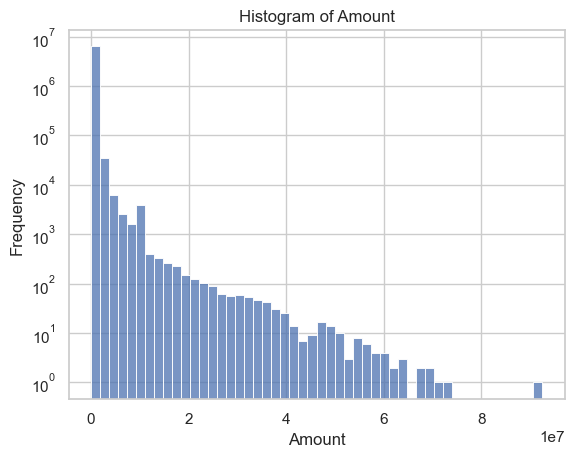

In [43]:
# create a histplot for amount

sns.histplot(dataframe['amount'], bins=50)
plt.title('Histogram of Amount')
plt.xlabel('Amount')
plt.yscale('log')
plt.ylabel('Frequency')
plt.show()

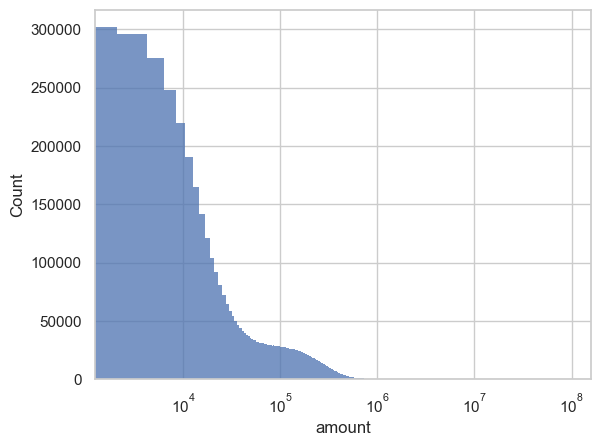

In [44]:
# create a histplot for amount

sns.histplot(dataframe["amount"], kde= False)
plt.xscale("log")
plt.show()

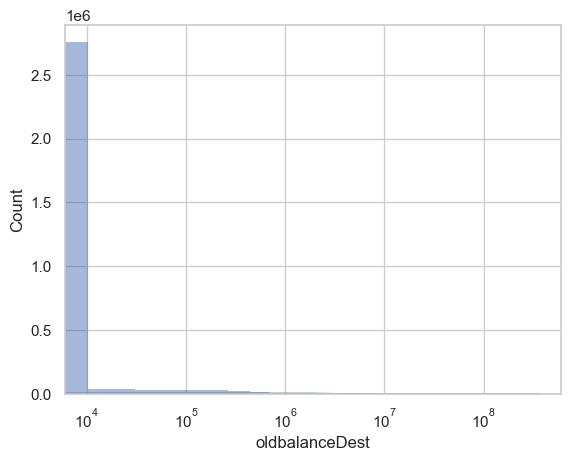

In [45]:
# create a histplot for oldbalanceDest

sns.histplot(dataframe["oldbalanceDest"], kde= True)
plt.xscale("log")
plt.show()

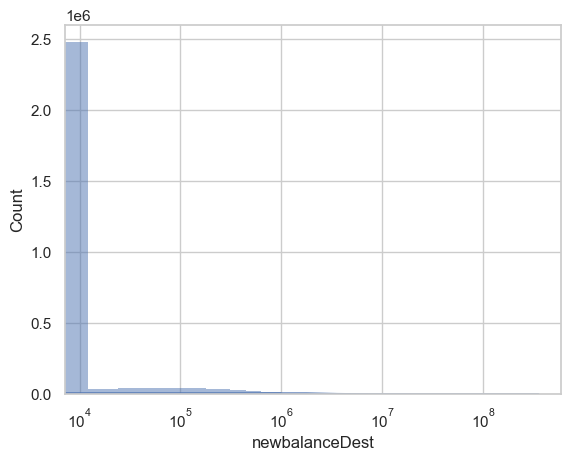

In [46]:
# create a histplot for newbalanceDest

sns.histplot(dataframe["newbalanceDest"], kde= True)
plt.xscale("log")
plt.show()

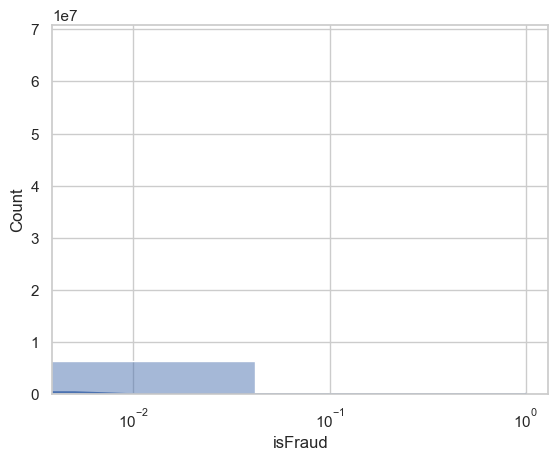

In [47]:
# create a histplot for isFraud

sns.histplot(dataframe["isFraud"], kde= True)
plt.xscale("log")
plt.show()

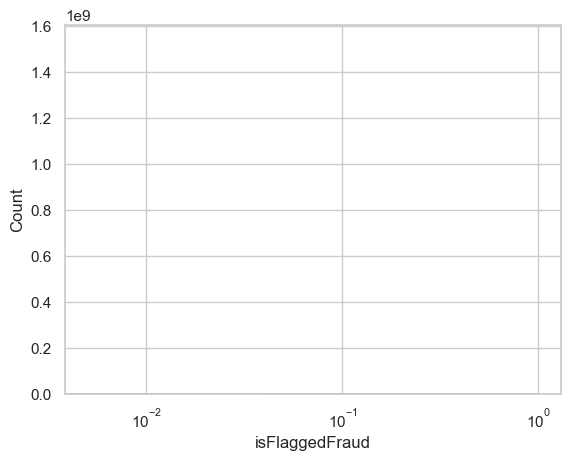

In [48]:
# create a histplot for isFlaggedFraud

sns.histplot(dataframe["isFlaggedFraud"], kde= True)
plt.xscale("log")
plt.show()

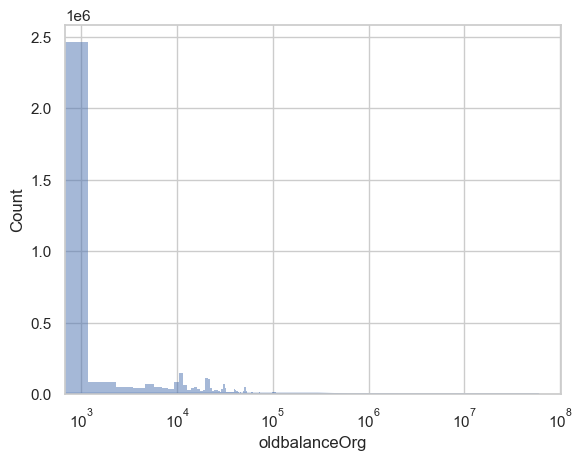

In [49]:
# create a histplot for oldbalanceOrg

sns.histplot(dataframe["oldbalanceOrg"], kde= True)
plt.xscale("log")
plt.show()

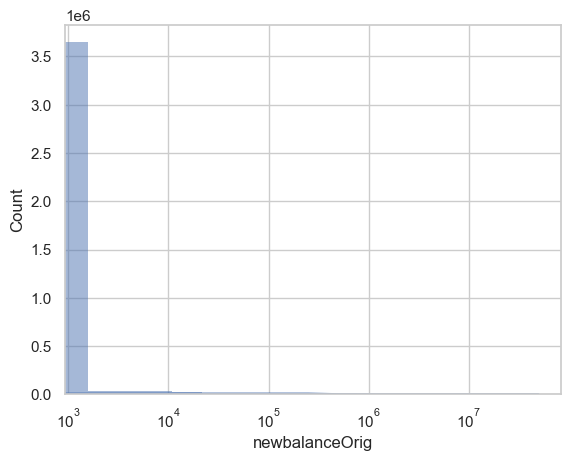

In [50]:
# create a histplot for newbalanceOrig

sns.histplot(dataframe["newbalanceOrig"], kde= True)
plt.xscale("log")
plt.show()

/var/folders/43/mc_jwg151jq0f2gdkv0rcmg00000gn/T/ipykernel_2812/2120456204.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/43/mc_jwg151jq0f2gdkv0rcmg00000gn/T/ipykernel_2812/2120456204.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


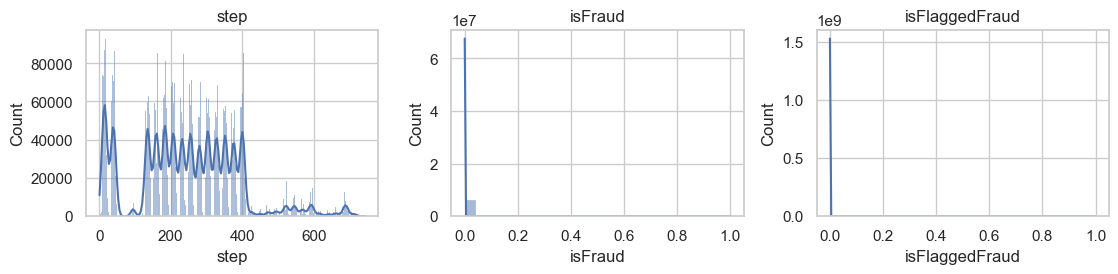

In [51]:
sns.set(style="whitegrid")

# Selecting numerical columns for distribution plots
numerical_cols = dataframe.select_dtypes(include=['int64']).columns

# Plotting distributions of numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(dataframe[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

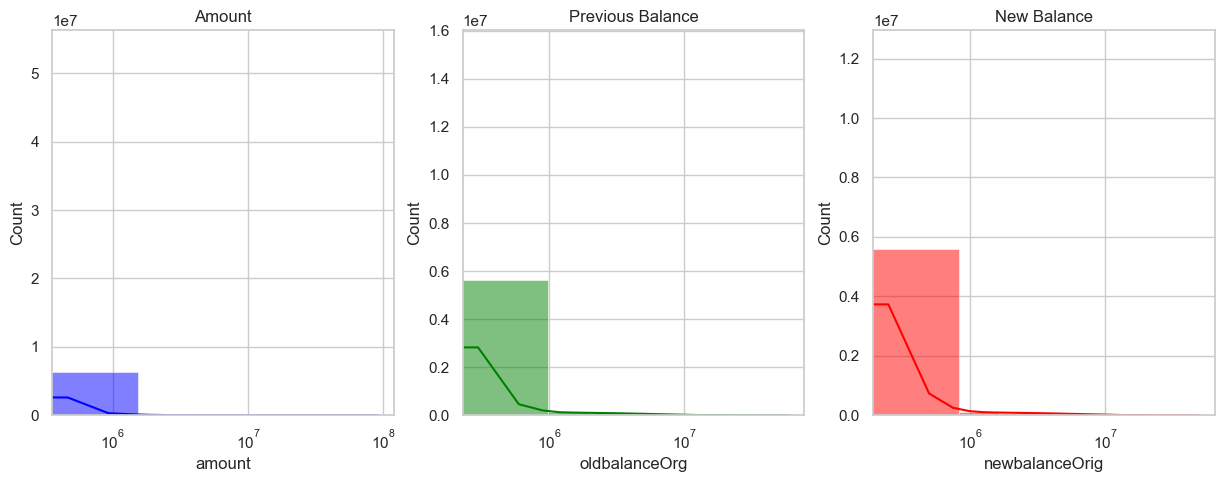

In [52]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Histograms for the distribution of grades (Amount, Old Balance, New Balance)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(dataframe['amount'], kde=True, bins=60, color='blue')
plt.xscale("log")
plt.title('Amount')

plt.subplot(1, 3, 2)
sns.histplot(dataframe['oldbalanceOrg'], kde=True, bins=60, color='green')
plt.xscale("log")
plt.title('Previous Balance')

plt.subplot(1, 3, 3)
sns.histplot(dataframe['newbalanceOrig'], kde=True, bins=60, color='red')
plt.xscale("log")
plt.title('New Balance')

plt.show()

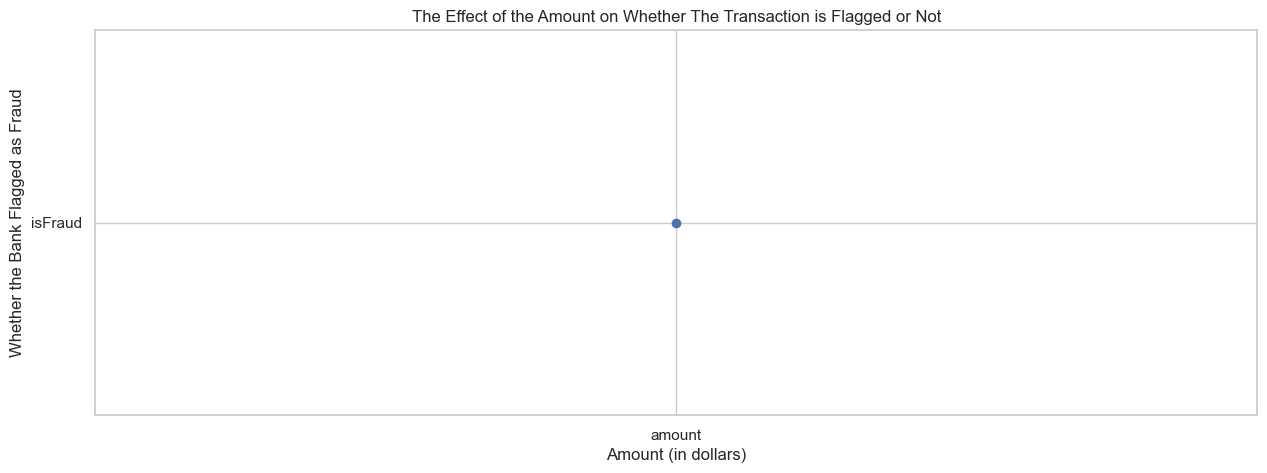

In [53]:
plt.figure(figsize=(15, 5))
plt.scatter(x="amount", y="isFraud")

plt.title("The Effect of the Amount on Whether The Transaction is Flagged or Not")
plt.ylabel("Whether the Bank Flagged as Fraud")
plt.xlabel("Amount (in dollars)")
plt.show()

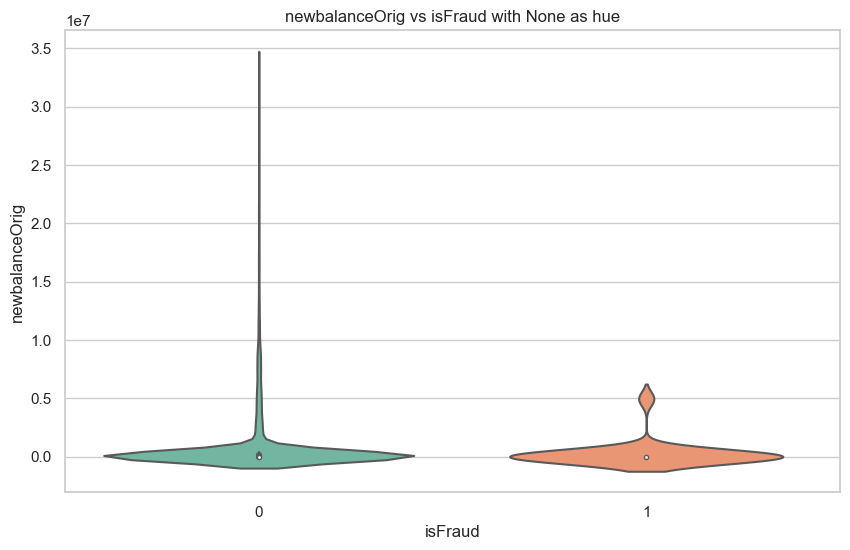

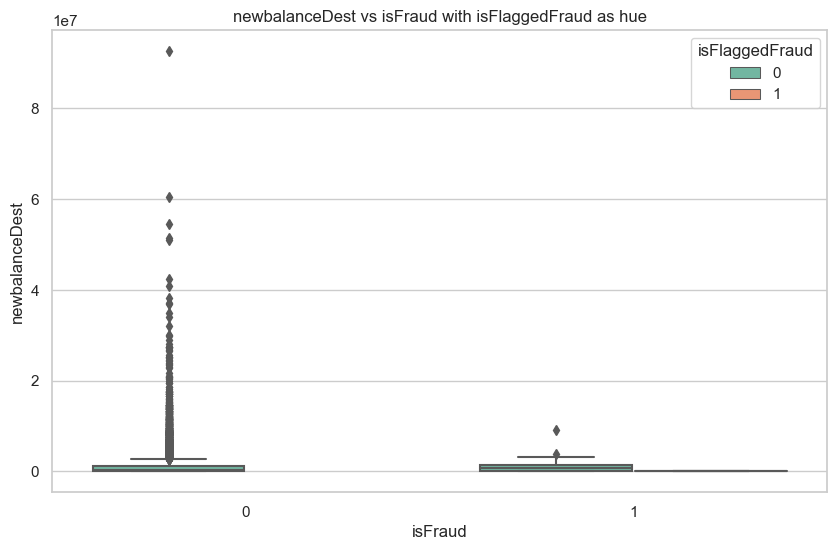

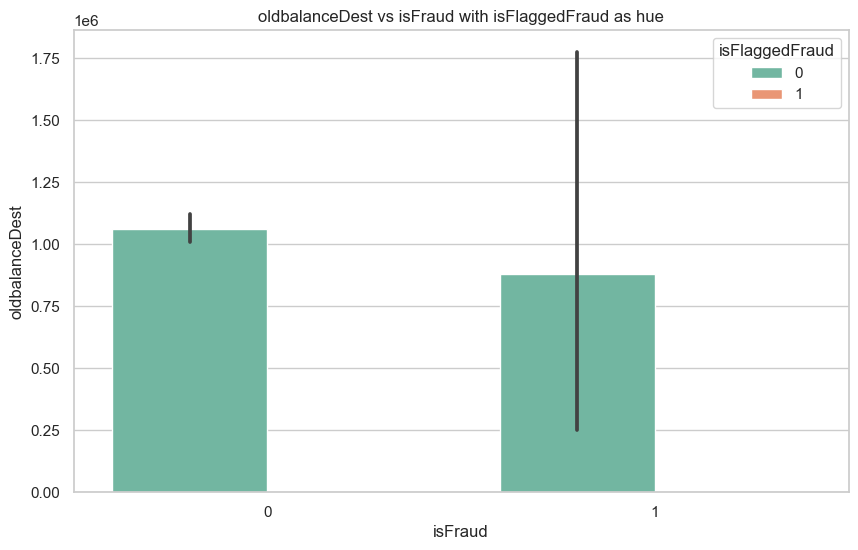

In [54]:
def plot_bivariate_hue(fraud_df, x, y, hue, plot_type="scatter"):
    plt.figure(figsize=(10, 6))
    if plot_type == "scatter":
        sns.scatterplot(x=x, y=y, hue=hue, data=fraud_df, palette="Set2")
    elif plot_type == "bar":
        sns.barplot(x=x, y=y, hue=hue, data=fraud_df, palette="Set2")
    elif plot_type == "box":
        sns.boxplot(x=x, y=y, hue=hue, data=fraud_df, palette="Set2")
    elif plot_type == "violin":
        sns.violinplot(x=x, y=y, hue=hue, data=fraud_df, palette="Set2")
    plt.title(f'{y} vs {x} with {hue} as hue')
    plt.show()

# Scatter plot with hue (for numerical variables)
plot_bivariate_hue(fraud_df, 'isFraud', 'newbalanceOrig', None, plot_type="violin")

# Box plot with hue (for mixed variables)
plot_bivariate_hue(fraud_df, 'isFraud', 'newbalanceDest', 'isFlaggedFraud', plot_type="box")

# # Bar plot with hue (for categorical variables)
plot_bivariate_hue(fraud_df, 'isFraud', 'oldbalanceDest', 'isFlaggedFraud', plot_type="bar")

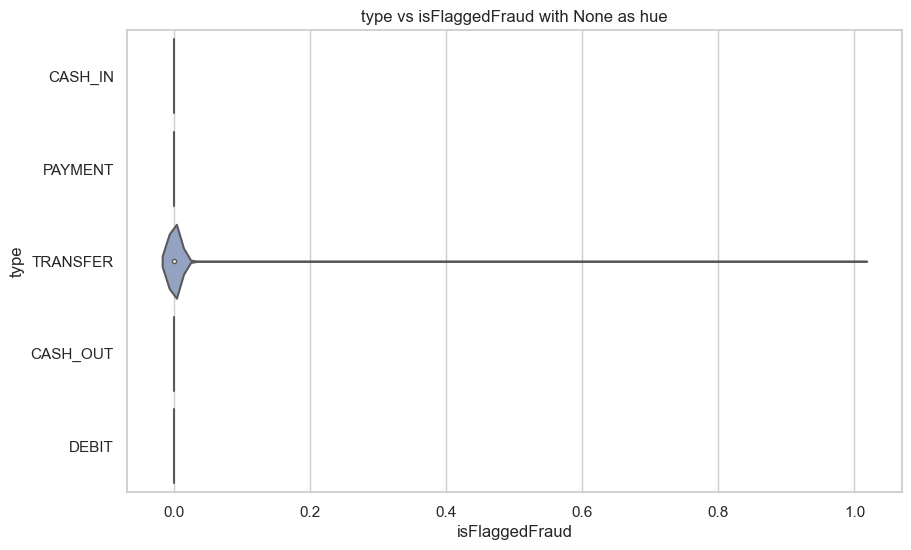

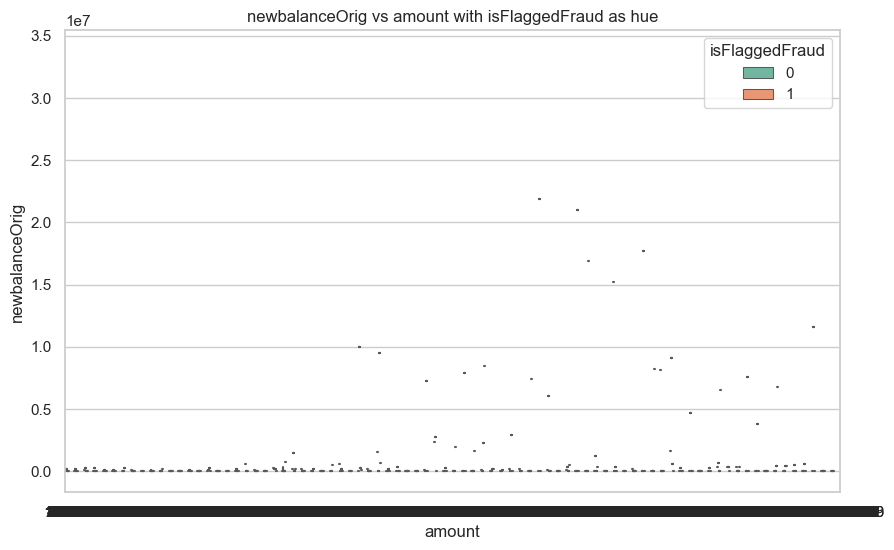

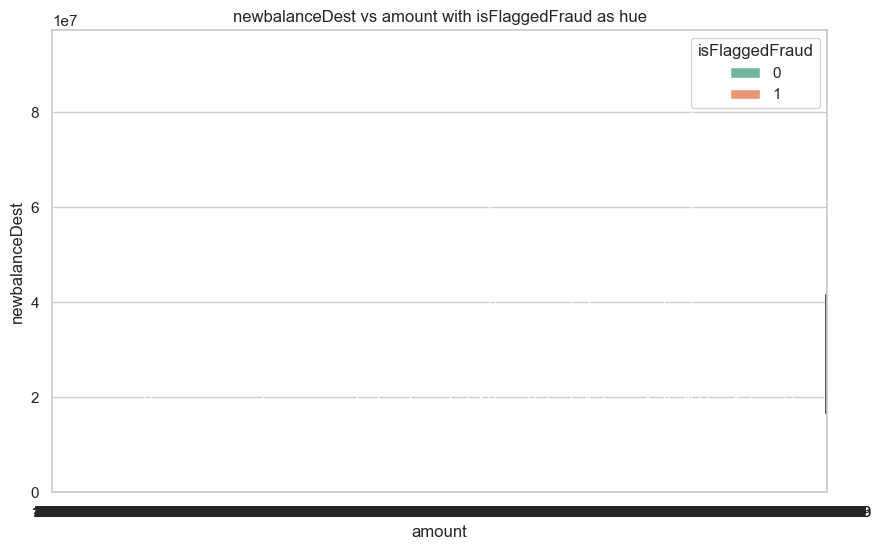

In [55]:
# Scatter plot with hue (for numerical variables)
plot_bivariate_hue(fraud_df, 'isFlaggedFraud', 'type', None, plot_type="violin")

# Box plot with hue (for mixed variables)
plot_bivariate_hue(fraud_df, 'amount', 'newbalanceOrig', 'isFlaggedFraud', plot_type="box")

# # Bar plot with hue (for categorical variables)
plot_bivariate_hue(fraud_df, 'amount', 'newbalanceDest', 'isFlaggedFraud', plot_type="bar")

/var/folders/43/mc_jwg151jq0f2gdkv0rcmg00000gn/T/ipykernel_2812/2651691509.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/43/mc_jwg151jq0f2gdkv0rcmg00000gn/T/ipykernel_2812/2651691509.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/43/mc_jwg151jq0f2gdkv0rcmg00000gn/T/ipykernel_2812/2651691509.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/43/mc_jwg151jq0f2gdkv0rcmg00000gn/T/ipykernel_2812/2651691509.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/43/mc_jwg151jq0f2gdkv0rcmg00000gn/T/ipykernel_2812/2651691509.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


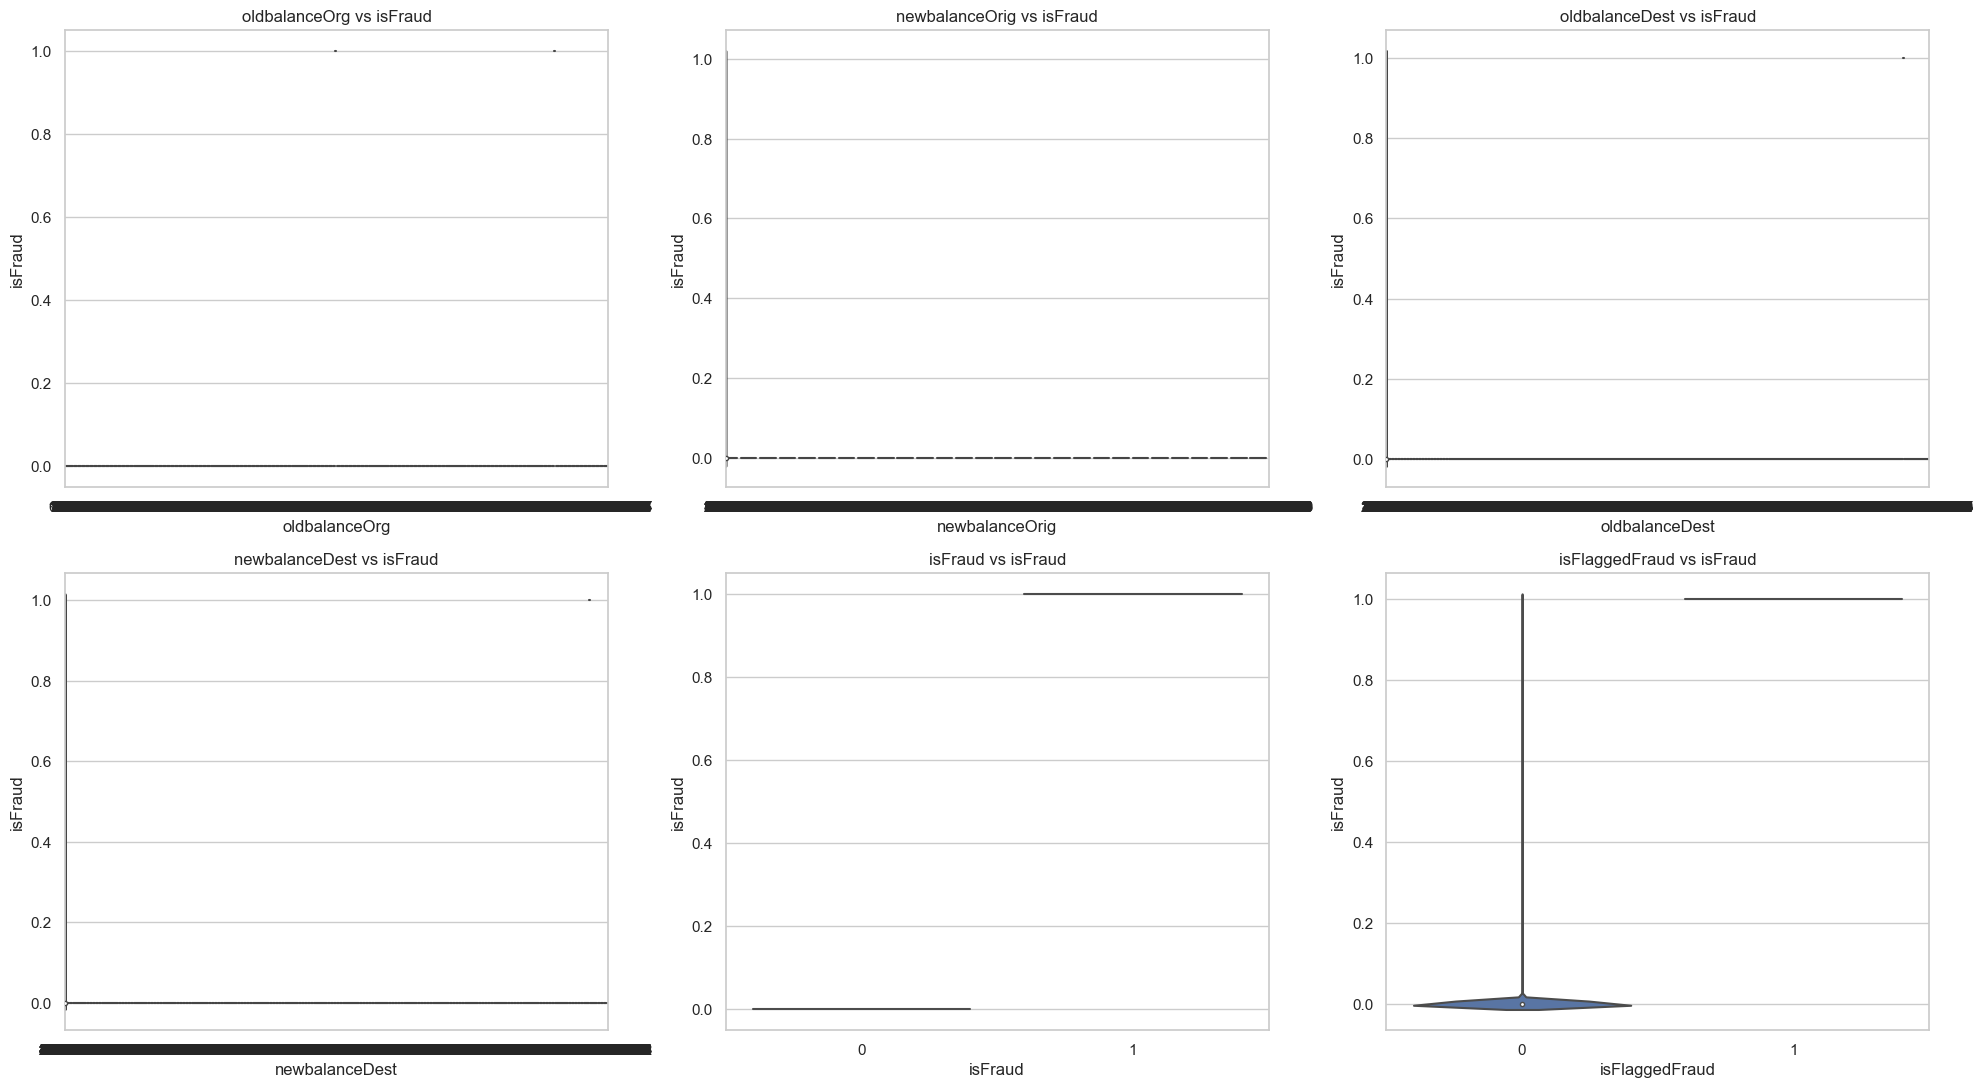

In [62]:
# Bivariate Analysis - Numerical Features vs isFraud Feature

# Selecting some key numerical features for bivariate analysis
key_numerical_features = ['oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud']

plt.figure(figsize=(20, 16))
for i, col in enumerate(key_numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.violinplot(x=fraud_df[col], y=fraud_df['isFraud'])
    plt.title(f'{col} vs isFraud')
    plt.tight_layout()

plt.show()

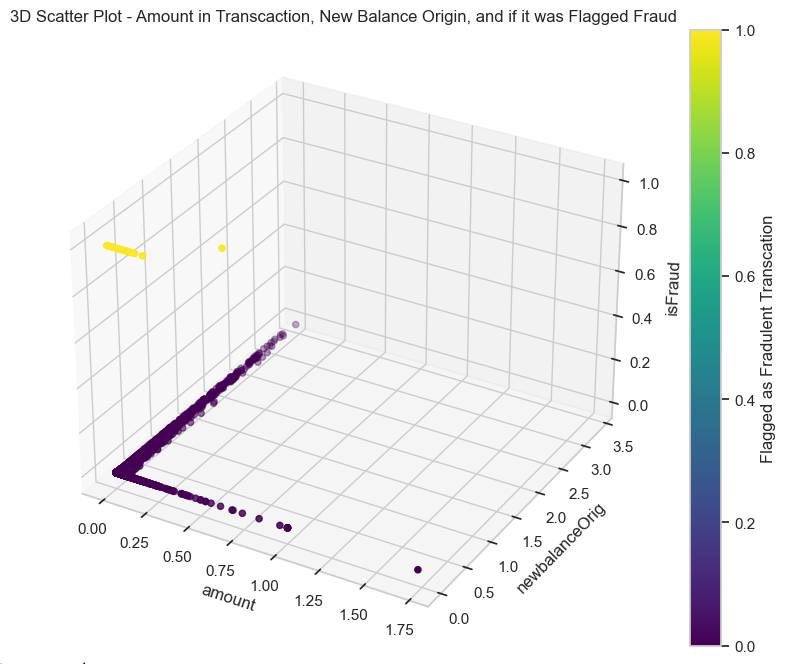

In [64]:
from mpl_toolkits.mplot3d import Axes3D

# Selecting variables for the 3D plot
x_3d, y_3d, z_3d = 'amount', 'newbalanceOrig', 'isFraud'

# Creating a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(fraud_df[x_3d], fraud_df[y_3d], fraud_df[z_3d], c=fraud_df[z_3d], cmap='viridis')

# Labels and title
ax.set_xlabel(x_3d)
ax.set_ylabel(y_3d)
ax.set_zlabel(z_3d)
ax.set_title('3D Scatter Plot - Amount in Transcaction, New Balance Origin, and if it was Flagged Fraud')

# Color bar indicating the values of G3
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Flagged as Fradulent Transcation')

plt.show()

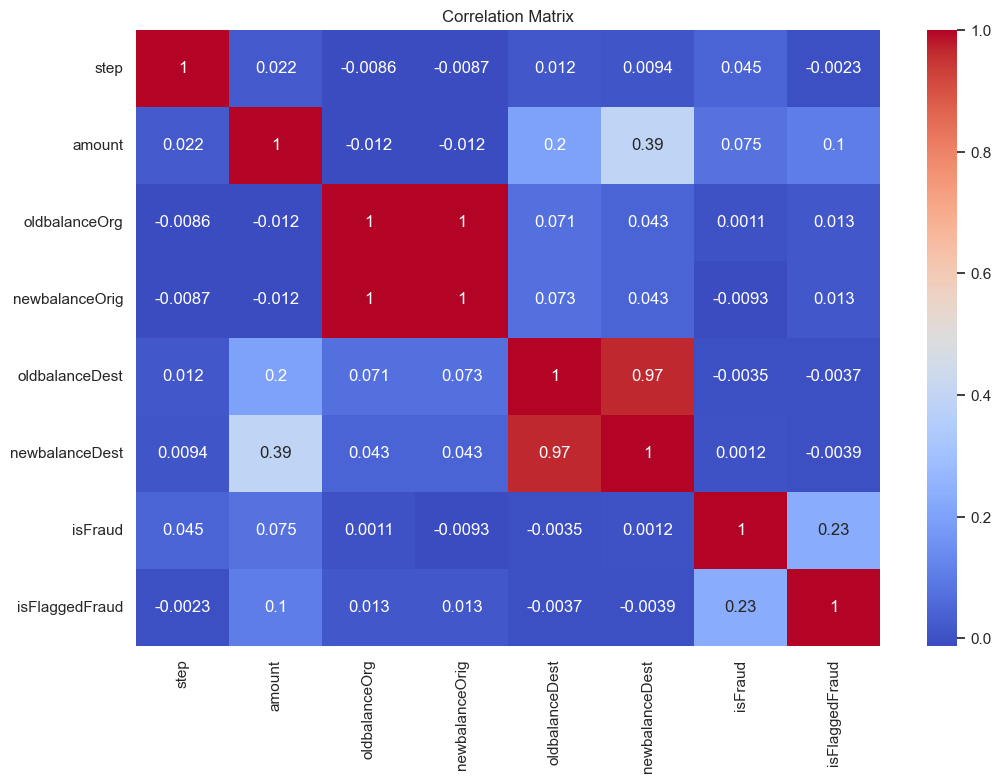

In [66]:
# Correlation matrix
correlation_matrix = fraud_df.corr(numeric_only=True)

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

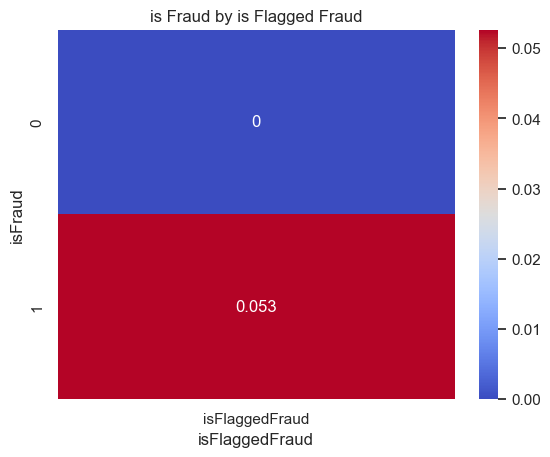

In [69]:
# Create a heatmap for absences and grades
absence_grade = pd.pivot_table(fraud_df, values='isFlaggedFraud', index='isFraud', aggfunc=np.mean)
sns.heatmap(absence_grade, annot=True, cmap='coolwarm')
plt.title('is Fraud by is Flagged Fraud')
plt.xlabel('isFlaggedFraud')
plt.ylabel('isFraud')
plt.show()

<Axes: >

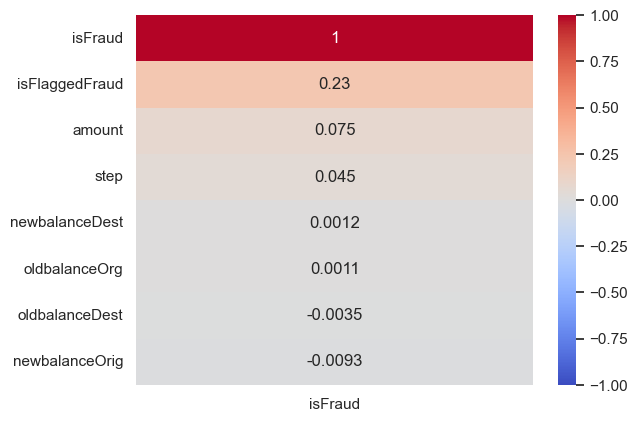

In [71]:
corr = fraud_df.corr(numeric_only=True)

# Create a heatmap for only the G3 correlations
sns.heatmap(corr[['isFraud']].sort_values(by='isFraud', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')